In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [16]:
tweets = pd.read_csv('./TweetData1.csv')

In [17]:
tweets.head()

,tweetid,datetime,twitterhandle,tweetcontent,accountname,region,portfolio,subportfolio
0,1.345310e+18,2021-01-02 10:10:40+00:00,ericsson,"Fast, accurate and sustainable #5G #Innovation...",Ericsson,NCE,NEE,Telecommunications
1,1.346410e+18,2021-01-05 10:50:21+00:00,Nestle,A new take on breakfast has hit shelves in Ita...,NESTLE,NCE,DACH,Retail
2,1.346800e+18,2021-01-06 12:30:00+00:00,ericsson,"Undeniably, #IoT is changing how we live and w...",Ericsson,NCE,NEE,Telecommunications
3,1.347050e+18,2021-01-07 05:00:00+00:00,ericsson,What can you do to boost employee #innovation ...,Ericsson,NCE,NEE,Telecommunications
4,1.347130e+18,2021-01-07 10:25:12+00:00,MOFUAE,#MOFUAE adheres to the standards on the use of...,MINISTRY OF FINANCE - UAE,UKIIMEA,MEA,Public Sector


In [18]:
features = tweets.tweetcontent
target = tweets.subportfolio

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)

In [21]:
# instantiate a CountVectorizer object
vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [22]:
# can get the token names from the vectorizer once it's fit
print(vect.get_feature_names()[:20])
print(vect.get_feature_names()[-20:])

['00', '000', '00am', '05dz7hjwlh', '06gqp7rwkf', '0axp69b51v', '0hflmg2ms6', '0lvjnl4aaq', '0no8uuiaya', '0o9zudxwar', '0rheg6cklu', '0s3afwofgq', '0tffrt0uis', '0ubapwphbc', '0y80d3oays', '0yjyvxxscj', '0ysc4l8tbk', '10', '100', '100th']
['zhao', 'zhb7hdlhas', 'zhcykr4vah', 'zhhllogeim', 'zioq7svpqm', 'zipgkihukb', 'zj3a69xp2w', 'zjqqslye0n', 'zo8beugmre', 'zones', 'zpqzmq5akm', 'zrerlxblwv', 'zrrdgp5o8q', 'ztdfmxcbqa', 'ztpmgh7ptt', 'zu3bawmc7s', 'zx6ovbnuom', 'zxdjbvtuv9', 'zxm242ecgu', 'zysn751jew']


In [23]:
X_train_dtm.shape

(506, 4047)

In [24]:
lr = LogisticRegression(max_iter=500)

lr.fit(X_train_dtm, y_train)
y_pred = lr.predict(X_test_dtm)
print(X_test[:3], '\n', y_pred[:3])

lr.score(X_test_dtm, y_test)

720    #Cloud Vorreiter in der Bankenbranche: Mit uns...
90     Financial #innovations require the highest lev...
21     We are working alongside the US Navy to furthe...
Name: tweetcontent, dtype: object 
 ['Telecommunications' 'Public Sector' 'Manufacturing']


0.764

In [25]:
# check baseline accuracy
tweets.subportfolio.value_counts(normalize=True)

Telecommunications               0.182540
Retail                           0.144180
Public Sector                    0.141534
Chemicals & Agriculture          0.109788
Manufacturing                    0.099206
IT & Digital Transformation      0.099206
Enterprise Software              0.067460
Energy Utility & Tech.           0.064815
BCM                              0.031746
Insurance                        0.026455
Transportation                   0.011905
Aerospace Defence Security       0.010582
Electronics Health Technology    0.010582
Name: subportfolio, dtype: float64

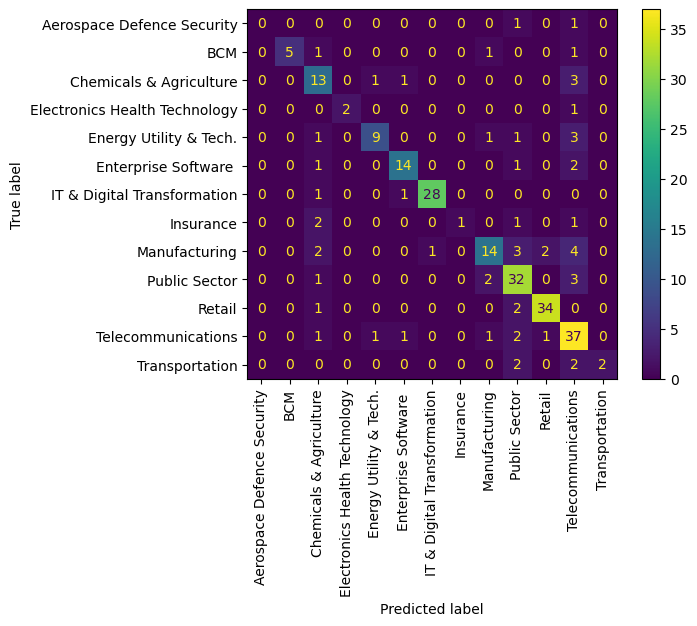

In [28]:
import matplotlib.pyplot as plt
plt.style.use('default')
plot_confusion_matrix(lr, X_test_dtm, y_test, xticks_rotation='vertical');

## Latent Dirichlet Allocation

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

In [64]:
tweets = pd.read_csv('./TweetData1.csv')

In [49]:
corpus = tweets.tweetcontent.values

In [46]:
vect = CountVectorizer(max_df=0.90, min_df=3, ngram_range=(1, 2), max_features=2000, stop_words='english')

In [51]:
dtm = vect.fit_transform(corpus)

In [57]:
lda = LatentDirichletAllocation(n_components=5)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5)

In [58]:
# this is a list of how closely each word aligns with each topic
lda.components_

array([[0.20000126, 0.20000106, 2.19304539, ..., 2.34049142, 0.20000031,
        0.20000031],
       [7.19829006, 5.19999329, 0.20194148, ..., 0.20068198, 0.20000035,
        0.20000035],
       [0.20000254, 0.20000208, 0.2073528 , ..., 5.05671098, 3.19999818,
        3.19999818],
       [0.20170496, 0.2000026 , 0.2000114 , ..., 0.20000909, 0.20000085,
        0.20000085],
       [0.20000118, 0.20000096, 1.19764894, ..., 0.20210652, 0.2000003 ,
        0.2000003 ]])

In [61]:
# this will let us view the most important words for each topic, as determined by LDA

def display_topics(model, feature_names, no_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index}")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15

In [62]:
display_topics(lda, vect.get_feature_names(), no_top_words)

Topic 0
https, innovation, innovative, idea, amp, read, support, virtual, defence, new, world, agency, look, colleagues, submit
Topic 1
https, innovation, learn, 5g, new, register, today, innovative, amp, future, business, register https, june, join, product
Topic 2
https, innovation, innovative, amp, sap, help, innovators, industry, new, customers, global, challenge, science, future, technology
Topic 3
https, use, packaging, new, solutions, innovation, amp, business, innovative, 5g, plastics, systems, models, amp innovative, reduce
Topic 4
https, innovation, based, new, innovative, learn, plant, discover, plant based, nestlé, innovation https, plantbased, technology, learn https, 2021


#### Larger Dataset

In [65]:
bigtweets = pd.read_csv('./bigtweets.csv')

In [67]:
bigtweets.head()

,TweetId,Datetime,TwitterHandle,Tweetcontent
0,1.465100e+18,2021-11-28 23:26:06+00:00,VW,"@GiggsyTheCorgi Hi there, we hope you were abl..."
1,1.465100e+18,2021-11-28 23:27:10+00:00,VW,"@breebousley13 Hi Aubrey, we can understand ho..."
2,1.465150e+18,2021-11-29 03:02:53+00:00,Airbus,Congratulations 🎉 @CebuPacificAir on the deliv...
3,1.465190e+18,2021-11-29 05:22:06+00:00,SAP,Experience:💸 @SAPAriba for direct and indirect...
4,1.465210e+18,2021-11-29 06:33:08+00:00,Philips,@SOOOOOMA______ Good morningThank you for your...


In [68]:
corpus = bigtweets.Tweetcontent.values

In [69]:
vect = CountVectorizer(max_df=0.90, min_df=3, ngram_range=(1, 2), max_features=2000, stop_words='english')

In [70]:
dtm = vect.fit_transform(corpus)

In [75]:
lda = LatentDirichletAllocation(n_components=10)
lda.fit(dtm)

LatentDirichletAllocation()

In [76]:
# this is a list of how closely each word aligns with each topic
lda.components_

array([[ 0.1       ,  0.1000011 ,  0.10000019, ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.10000307,  0.10000045,  0.10000013, ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.10000425,  0.10000308,  0.10002739, ...,  0.1       ,
         0.1       ,  0.1       ],
       ...,
       [ 0.10005434, 26.90596179,  0.10001279, ..., 10.09999899,
        13.09969445, 11.1       ],
       [ 0.10000993,  0.10002441,  0.10001259, ...,  0.10000048,
         0.1       ,  0.1       ],
       [21.09989266,  0.10000553, 39.63972074, ...,  0.1       ,
         0.1       ,  0.1       ]])

In [77]:
# this will let us view the most important words for each topic, as determined by LDA

def display_topics(model, feature_names, no_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index}")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15

In [78]:
display_topics(lda, vect.get_feature_names(), no_top_words)

Topic 0
reaching, thank, sharing, vw, bmw, thanks, social, recommend, help, hello, order, information, thanks sharing, need, happy
Topic 1
https, covid, hi, 19, try, covid 19, know, let, uk, let know, given, booster, delay, vaccine, nicola
Topic 2
hi, sorry, dm, address, number, details, account, team, help, look, eonhelp, hear, ll, https, able
Topic 3
hi, thank, message, contact, hello, send, https, soon, team, hear, sorry, help, thanks, link, customer
Topic 4
https, new, year, amp, christmas, covid19, support, people, day, booster, learn, help, uk, today, microfocus
Topic 5
https, free, care, feel, information, feel free, imaginepossible, new, future, change, read, help, 5g, know, 2021
Topic 6
hi, sorry, dm, hear, card, sorry hear, thanks, ve, account, details, ll, having, branch, send, able
Topic 7
https, sie, die, wir, der, und, team, في, 0345, replied, banking, المالية, den, على, من
Topic 8
https, amp, service, services, 2022, ve, help, thanks, website, able, mofuae, digital, repo

### Compare innovation and non innovation tweets

take a string and return True if contains innovation, false otherwise. use that function to make a new column in pandas using .apply

In [121]:
bigtweets = pd.read_csv('./bigtweets.csv')

In [109]:
bigtweets.head()

,TweetId,Datetime,TwitterHandle,Tweetcontent,Innovation
0,1.465100e+18,2021-11-28 23:26:06+00:00,VW,"@GiggsyTheCorgi Hi there, we hope you were abl...",False
1,1.465100e+18,2021-11-28 23:27:10+00:00,VW,"@breebousley13 Hi Aubrey, we can understand ho...",False
2,1.465150e+18,2021-11-29 03:02:53+00:00,Airbus,Congratulations 🎉 @CebuPacificAir on the deliv...,False
3,1.465190e+18,2021-11-29 05:22:06+00:00,SAP,Experience:💸 @SAPAriba for direct and indirect...,False
4,1.465210e+18,2021-11-29 06:33:08+00:00,Philips,@SOOOOOMA______ Good morningThank you for your...,False


In [117]:
import re

In [127]:
bigtweets["Innovation"] = bigtweets["Tweetcontent"].str.contains("innovation|innovator|innovative", flags=re.IGNORECASE, regex=True)

In [128]:
mask = (bigtweets.Innovation == True)

In [129]:
masktweets = bigtweets[mask]

In [130]:
masktweets.size

135

In [131]:
corpus = masktweets.Tweetcontent.values

In [132]:
vect = CountVectorizer(max_df=0.90, min_df=3, ngram_range=(1, 2), max_features=2000, stop_words='english')

In [133]:
dtm = vect.fit_transform(corpus)

In [134]:
lda = LatentDirichletAllocation(n_components=5)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5)

In [135]:
# this is a list of how closely each word aligns with each topic
lda.components_

array([[ 4.19993501,  0.20137392,  0.20000787,  3.19872606,  2.20111267,
         2.20278479,  4.36045633,  7.19778816,  5.20375251,  0.20000639,
         0.20001556,  0.20248477,  0.2023974 ,  0.20002495,  2.20347434,
         0.20000637,  0.20000637,  0.20000767,  0.20000836,  0.20001372,
         3.1992132 ,  0.20001854],
       [ 0.20000351,  0.20001086,  3.1977095 ,  1.19194782,  0.20000751,
         0.20000943, 16.07124644,  0.20000817,  8.19605316,  3.19990918,
         0.20245723,  0.20001354,  0.20000971,  1.19638558,  2.20060429,
         3.19990906,  3.19990906,  4.19810761,  3.19739937,  0.20000993,
         0.20000563,  1.19865101],
       [ 0.20000399,  3.19842592,  0.2000066 ,  0.20160496,  2.19874912,
         1.19704277, 14.03104798,  0.20206047,  0.20001268,  0.20000529,
         1.18364758,  9.19725701,  3.19741568,  2.20328394,  1.19564137,
         0.20000526,  0.20000526,  0.20000638,  0.20000701,  2.19371758,
         0.2006797 ,  2.2011048 ],
       [ 0.20001636

In [136]:
# this will let us view the most important words for each topic, as determined by LDA

def display_topics(model, feature_names, no_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index}")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15

In [137]:
display_topics(lda, vect.get_feature_names(), no_top_words)

Topic 0
imaginepossible, innovation, https, 5g, space, explore, new, hear, future, innovative, learn, amp, like, working, innovations
Topic 1
https, innovation, read, innovation https, plantbased innovation, plantbased, based, read https, new, working, like, explore, innovations, innovative, amp
Topic 2
https, innovative, amp, learn, like, working, future, solutions, hear, new, innovations, imaginepossible, explore, space, innovation
Topic 3
innovations, https, explore, solutions, based, read https, read, new, like, innovative, working, learn, amp, innovation, hear
Topic 4
https, like, new, innovative, explore, working, amp, innovations, innovation, solutions, learn, hear, imaginepossible, future, space
